In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score
import pickle as pkl
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('data/processed_data.csv')

In [3]:
df.head()

,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,net_disposable_income
0,0,4,-0.106043,3,1.929418,4,1.792355,0.31,-0.794462,-1.564522,0,1,-0.161591
1,0,3,-1.271863,2,-1.210642,1,0.063765,0.08,-1.085922,-2.040870,1,0,-1.093193
2,0,3,-1.271863,0,-0.726065,3,0.679086,0.31,-0.794462,0.037741,0,1,-1.093193
3,0,1,0.102745,3,1.929418,3,1.518483,0.31,-1.085922,0.903829,0,1,0.052455
4,1,4,-0.261545,3,1.929418,3,1.177034,0.31,-0.503002,-1.023217,0,1,-0.309105


In [4]:
X = df[['person_gender', 'person_education', 'person_income', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'net_disposable_income']]
y = df['loan_status']

In [5]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [7]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [8]:
y_train.value_counts()

loan_status
0    28010
1    28010
Name: count, dtype: int64

In [9]:
# train random forest model
random_forest = RandomForestClassifier(random_state=42, class_weight='balanced')
random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [10]:
# prediction
y_pred = random_forest.predict(X_test)

In [11]:
# accuracy and cross valudation of random forest
accuracy = accuracy_score(y_test, y_pred)
cross_val = cross_val_score(random_forest, X, y, cv=5)

accuracy, np.mean(cross_val)

(0.9156666666666666, 0.9230444444444444)

## Model Evaluation

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [13]:
# claddification report of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      6990
           1       0.78      0.86      0.82      2010

    accuracy                           0.92      9000
   macro avg       0.87      0.90      0.88      9000
weighted avg       0.92      0.92      0.92      9000



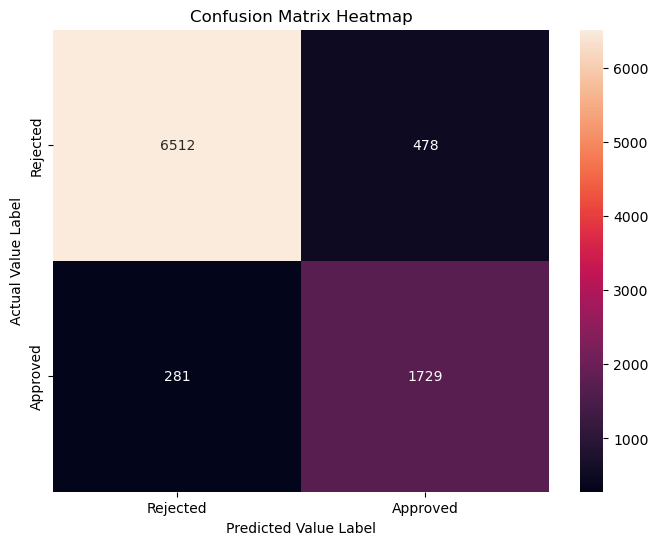

In [14]:
# heatmap with confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted Value Label')
plt.ylabel('Actual Value Label')
plt.title('Confusion Matrix Heatmap')
plt.savefig('charts/confusion_matrix.png')
plt.show()

In [15]:
# save the model to local directory
pkl.dump(random_forest, open('random_forest.pkl', 'wb'))